In [2]:
import sys
sys.path.append("..")

In [95]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from pyFDA import bspline, gaussNewton
from pyFDA.register import localRegression

In [133]:
reload(gaussNewton)
reload(localRegression)

<module 'pyFDA.register.localRegression' from '../pyFDA/register/localRegression.py'>

In [5]:
%matplotlib inline

In [121]:
def gFunction(t,theta):
	return np.exp(theta[0]) *(t+theta[1])

In [122]:
n = 200
t = np.linspace(0,6,n)

theta1points = .01*((t-3)**2 - 9)
theta1 = bspline.Bspline(t,theta1points)
h = gFunction(t,[theta1(t),0,0])
hspline = bspline.Bspline(t,h)


x = np.cos(t**3/(np.pi**2))
y = np.cos(hspline(t)**3/(np.pi**2))

In [123]:
hinv = bspline.Bspline(h,t)

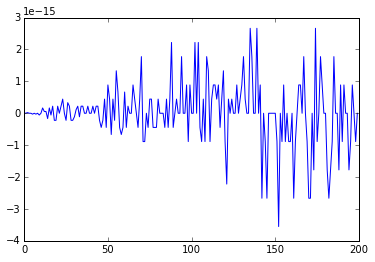

In [126]:
plt.plot(hinv(hspline(t))-t)

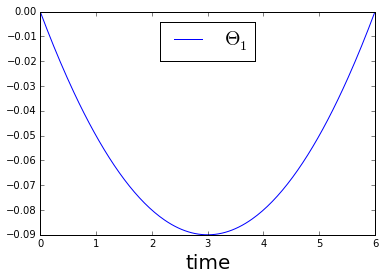

In [128]:
plt.plot(t,theta1(t),label="$\Theta_1$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

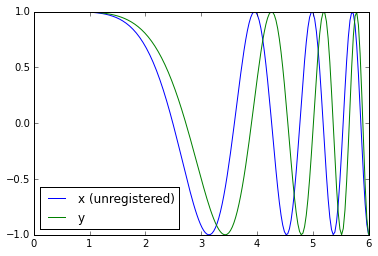

In [129]:
plt.plot(t,x,label="x (unregistered)")
plt.plot(t,y,label="y")
plt.legend(loc="best")

## Run with bandwidth = $\pi$/2, ridge = n/4, no decay 

In [134]:
lr = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi/2,ridge=n/4,decay=False)
lr.run(10)

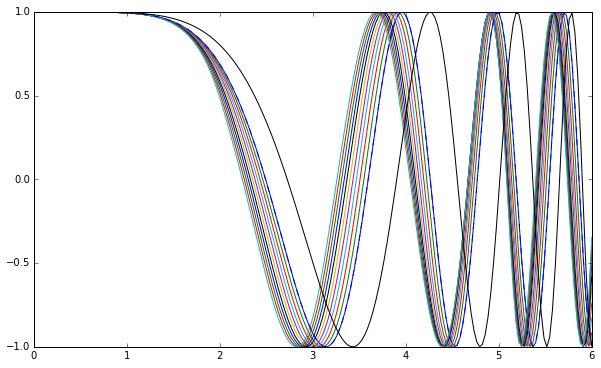

In [135]:
plt.figure(figsize=(10,6))
[plt.plot(t,z(t)) for z in lr.xhats]
# plt.plot(t,lr.xhats[1](t)); 
plt.plot(t,lr.xhats[0](t),'b--');
plt.plot(t,y,'k',linewidth=1);

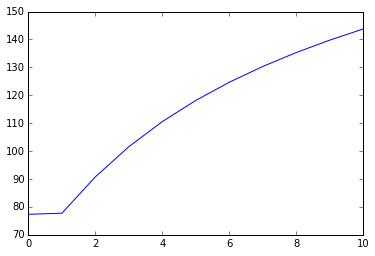

In [136]:
plt.plot(lr.error)

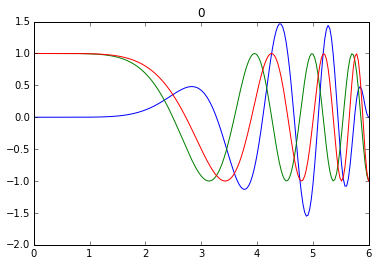

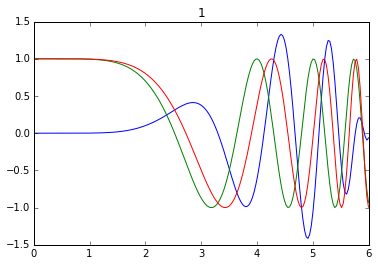

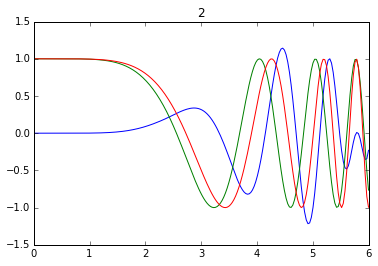

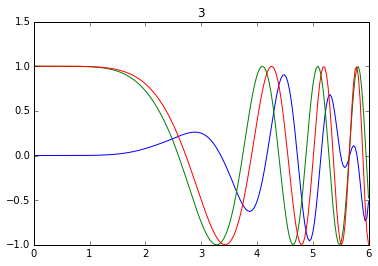

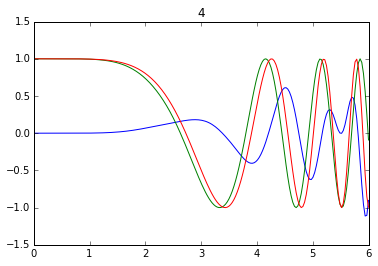

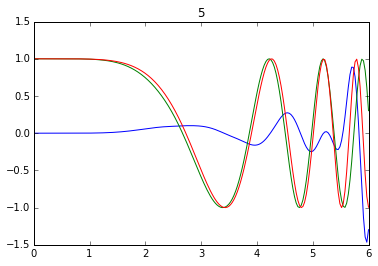

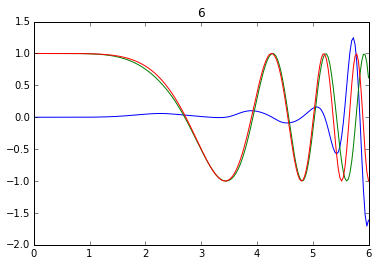

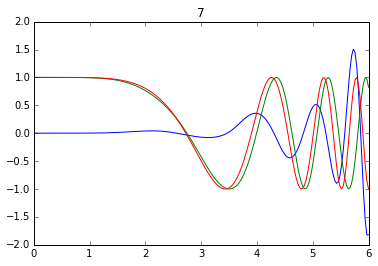

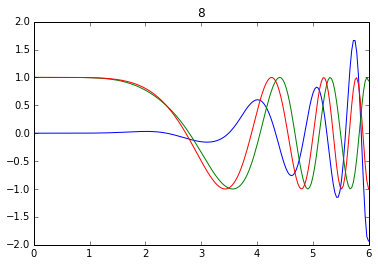

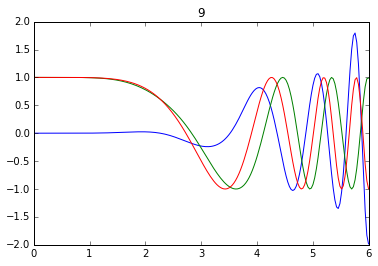

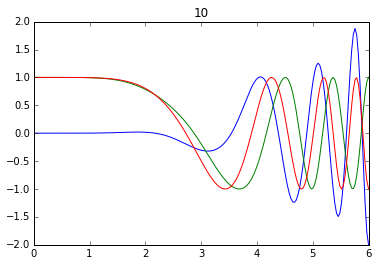

In [49]:
for i in range(11):
    lr.xspline = lr.xhats[i]
    xhat = lr.xhats[i](t)
    
    plt.figure()
    plt.plot(t,lr.residual(y,t,[0,0,0]))
    plt.plot(t,xhat)
    plt.plot(t,y)
    plt.title(i)

[[<matplotlib.lines.Line2D at 0x7fe459237990>],

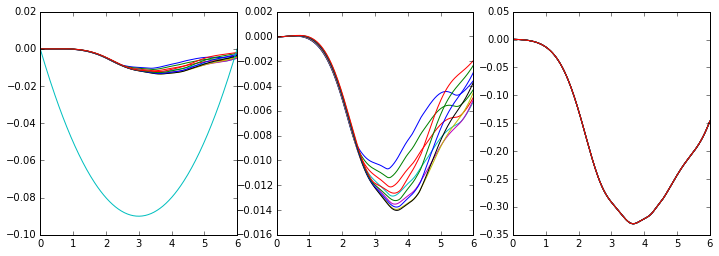

In [57]:
plt.figure(figsize=(12,4))
plt.subplot(131)
[plt.plot(t,lr.thetas()[i,:,0]) for i in range(10)]
plt.plot(t,theta1points)

plt.subplot(132)
[plt.plot(t,lr.thetas()[i,:,1]) for i in range(10)]

plt.subplot(133)
[plt.plot(t,lr.thetas()[i,:,2]) for i in range(10)]

## Run with bandwidth = $\pi$/2, ridge = n/4, no decay 

In [50]:
lr = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi/2,ridge=n/4,decay=True)
lr.run(10)

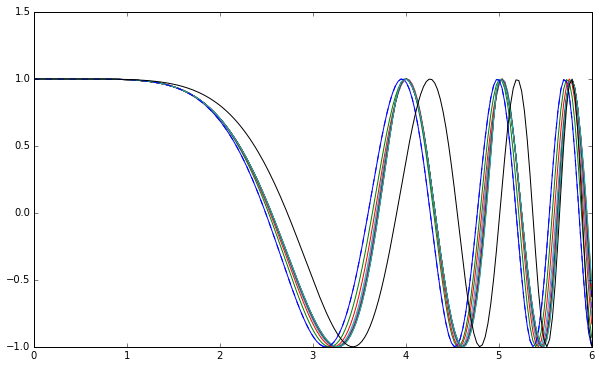

In [51]:
plt.figure(figsize=(10,6))
[plt.plot(t,z(t)) for z in lr.xhats]
# plt.plot(t,lr.xhats[1](t)); 
plt.plot(t,lr.xhats[0](t),'b--');
plt.plot(t,y,'k',linewidth=1);

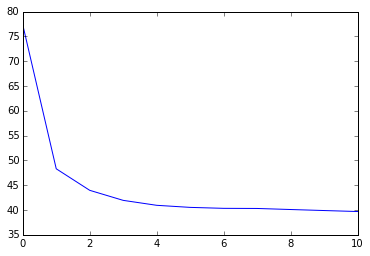

In [52]:
plt.plot(lr.error)

# Try a more complicated example 

In [139]:
n = 200
t = np.linspace(0,6,n)

theta1points = np.array([(0,0),(2,-.1),(4,.01),(6,0)])
theta1 = bspline.Bspline(theta1points[:,0],theta1points[:,1])
h = gFunction(t,[theta1(t),0,0])
hspline = bspline.Bspline(t,h)

x = np.cos(t**3/(np.pi**2))
y = np.cos(hspline(t)**3/(np.pi**2))

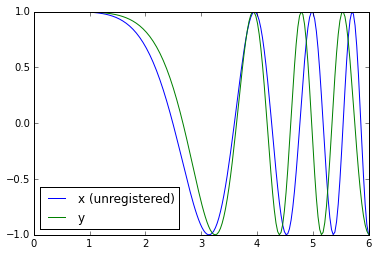

In [140]:
plt.plot(t,x,label="x (unregistered)")
plt.plot(t,y,label="y")
plt.legend(loc="best")

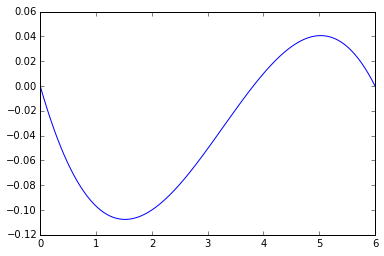

In [141]:
plt.plot(t,theta1(t))

In [148]:
lr = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi/4,ridge=n/4,decay=False)
lr.run(10)

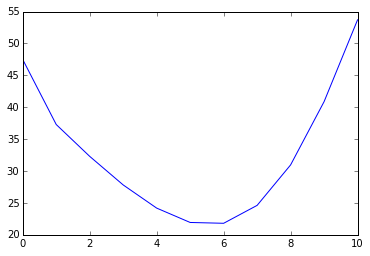

In [149]:
plt.plot(lr.error)

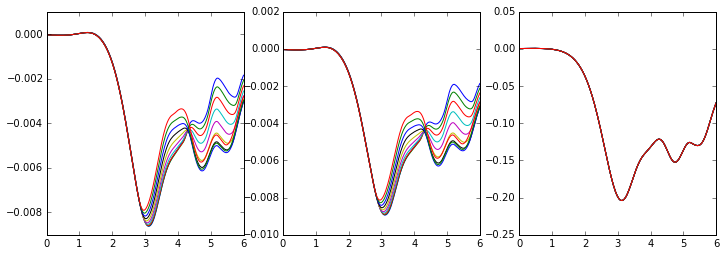

In [150]:
plt.figure(figsize=(12,4))
plt.subplot(131)
[plt.plot(t,lr.thetas()[i,:,0]) for i in range(10)]
# plt.plot(t,theta1(t))

plt.subplot(132)
[plt.plot(t,lr.thetas()[i,:,1]) for i in range(10)]

plt.subplot(133)
[plt.plot(t,lr.thetas()[i,:,2]) for i in range(10)];

[[<matplotlib.lines.Line2D at 0x7fe450b495d0>],

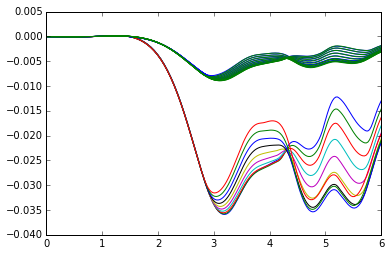

In [151]:
for i in range(10):
    g = [lr.g(t[j],lr.thetas()[i,j,:]) for j in range(n)]
    plt.plot(t,g-t)

[plt.plot(t,lr.thetas()[i,:,0],'b') for i in range(10)]
[plt.plot(t,lr.thetas()[i,:,1],'g') for i in range(10)]
# [plt.plot(t,lr.g(t,lr.thetas()[i,:,:])) for i in range(10)]

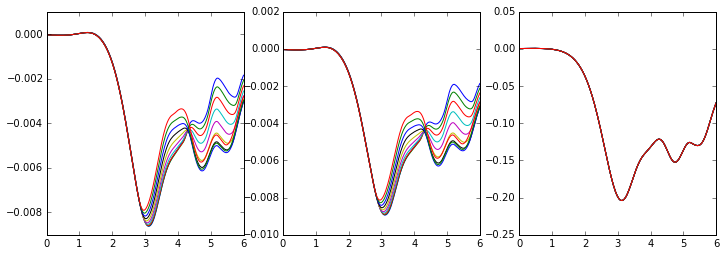

In [152]:
deltas = np.array(lr.deltas)

plt.figure(figsize=(12,4))
plt.subplot(131)
[plt.plot(t,deltas[i,:,0]) for i in range(10)]

plt.subplot(132)
[plt.plot(t,deltas[i,:,1]) for i in range(10)]

plt.subplot(133)
[plt.plot(t,deltas[i,:,2]) for i in range(10)];

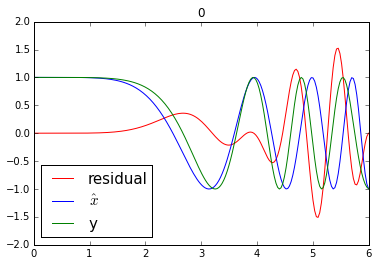

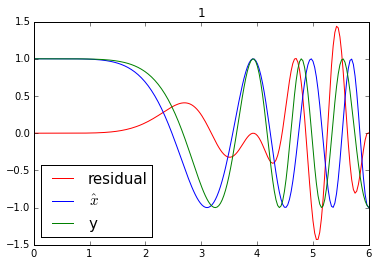

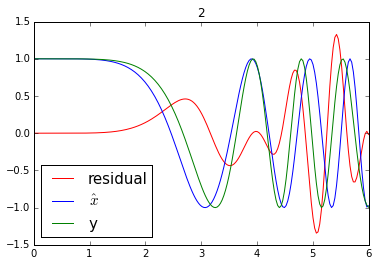

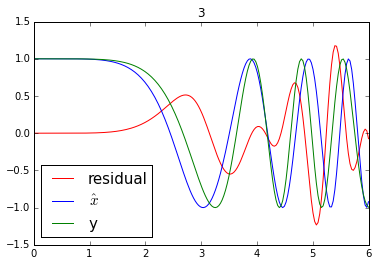

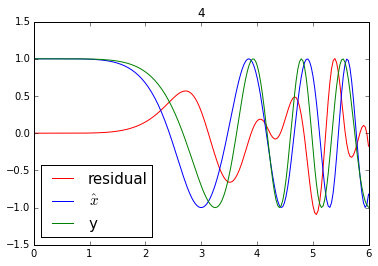

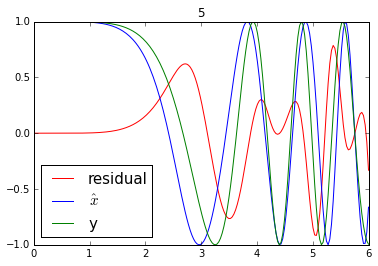

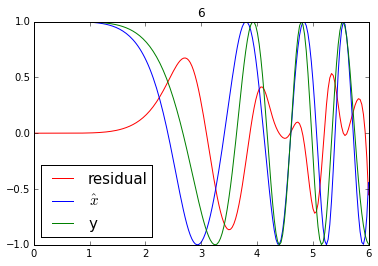

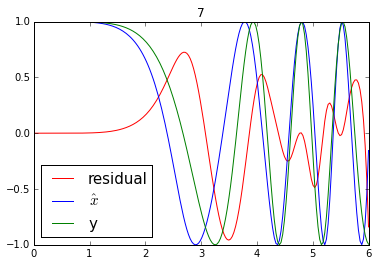

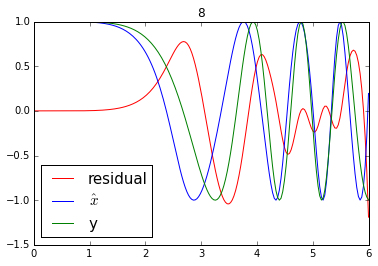

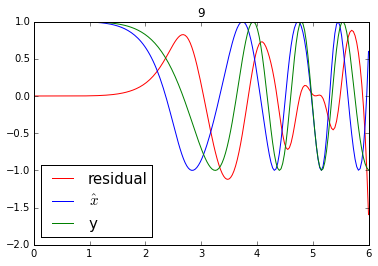

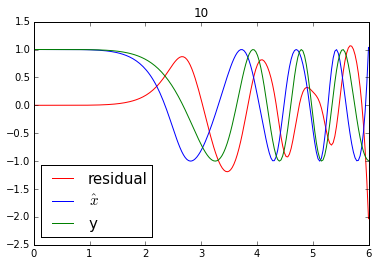

In [153]:
for i in range(11):
    lr.xspline = lr.xhats[i]
    xhat = lr.xhats[i](t)
    
    plt.figure()
    plt.plot(t,lr.residual(y,t,[0,0,0]),'r',label="residual")
    plt.plot(t,xhat,label='$\hat{x}$')
    plt.plot(t,y,label='y')
    plt.title(i)
    plt.legend(loc="best",fontsize=15)

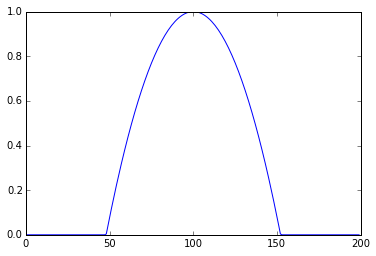

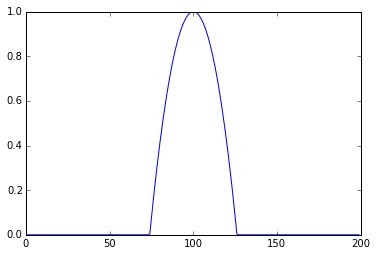

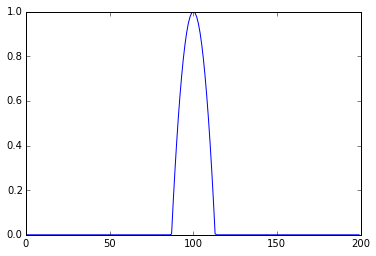

In [93]:
bandwidth = np.pi/2
variance = 1
for i in range(3):
    plt.figure()
    for j in range(n/2,n/2+1):
        decay = 2**(-i)
        w = 1 - variance * ((t - t[j])**2)/((bandwidth*decay)**2)
        w = np.max((w,np.zeros(x.shape[0])),0)
        plt.plot(w)

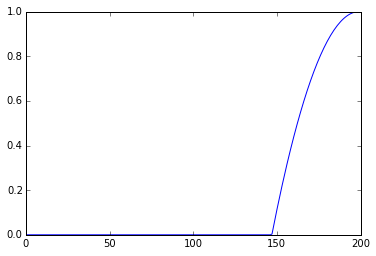

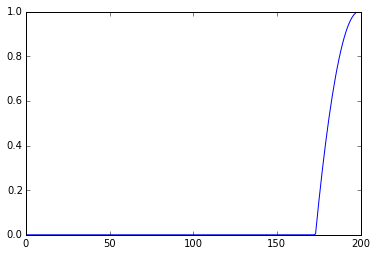

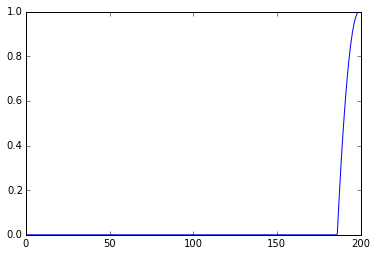

In [94]:
bandwidth = np.pi/2
variance = 1
for i in range(3):
    plt.figure()
    for j in range(n-1,n):
        decay = 2**(-i)
        w = 1 - variance * ((t - t[j])**2)/((bandwidth*decay)**2)
        w = np.max((w,np.zeros(x.shape[0])),0)
        plt.plot(w)

In [119]:
g

[-2.1435265112148388e-05,
 0.030127476407913988,
 0.060276339345571986,
 0.090425162915238569,
 0.1205739579460746,
 0.15072273688544902,
 0.18087151396873896,
 0.21102030540141889,
 0.24116912955161027,
 0.27131800715036847,
 0.30146696149575541,
 0.33161601865536561,
 0.36176520766047665,
 0.39191456068309277,
 0.42206411318505399,
 0.45221390402607264,
 0.4823639755150862,
 0.51251437338676453,
 0.54266514668251697,
 0.57281634751308741,
 0.60296803067803306,
 0.6331202531148421,
 0.6632730731356784,
 0.69342654943793502,
 0.72358073986871829,
 0.75373569992295664,
 0.78389148096075312,
 0.8140479640535454,
 0.84420516230483944,
 0.87436308508536409,
 0.90452172709595546,
 0.93468106517128924,
 0.96484105520854779,
 0.9950016288145197,
 1.0251626902844455,
 1.0553241136967444,
 1.0854857404988456,
 1.1156473774846258,
 1.1458087957807346,
 1.1759697302018715,
 1.2061298799008926,
 1.2362889100032268,
 1.2664464539341584,
 1.29660211670074,
 1.3267554789002269,
 1.3569061011915862,
 